In [1]:
import os
import numpy as n
from matplotlib import pyplot as plt
import pickle
import numpy.lib.recfunctions as rfn

In [2]:
from modules import utils

### Load the data
I did some preprocessing to the data from the dropbox folder and saved it as an easier-to-use dictionary object in `data/all_data.p` in this repository. To see how I did that to the original data (most of which is also included in this repository) see [format_and_save_data.ipynb](http://localhost:8888/notebooks/format_and_save_data.ipynb).

In [3]:
data_file = 'data/all_data.p'

f = open(data_file, 'rb')
all_data = pickle.load(f,)

`all_data` is a dictionary with each key corresponding to the data for one experiment. You can access a specific experiment by referencing the key as seen below

In [4]:
print("Experiments: " + str(list(all_data.keys())))
# pick the experiment you want here
experiment = all_data['Female1']

Experiments: ['Female1', 'Female2', 'Female4', 'Male1', 'Male2', 'Male3']


The variable `experiment` is a [structured array](https://numpy.org/doc/stable/user/basics.rec.html),  it contains many 'fields' that you can access by name and each field is an array. In our case, each field corresponds to one of the markers from DLC, the field `t` corrsponds to the timestamp and the field `ann` corresponds to the manual annotation of the behaviour at that time. If you prefer, you can load all this into a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which is a common format people use for this type of data - I just don't like it. 

In [5]:
print("Here are the names of all of the fields in this array: \n" + str(list(experiment.dtype.fields)))

Here are the names of all of the fields in this array: 
['t', 'ann', 'GreenTape_1_y', 'GreenTape_1_x', 'RedTape_1_y', 'RedTape_1_x', 'ImplantedTailBase_1_y', 'ImplantedTailBase_1_x', 'YellowEar_2_y', 'YellowEar_2_x', 'OrangeEar_2_y', 'OrangeEar_2_x', 'InteracteeTailBase_2_y', 'InteracteeTailBase_2_x', 'Head_1_y', 'Head_1_x', 'NapeCenter_1_y', 'NapeCenter_1_x', 'NapeRight_1_y', 'NapeRight_1_x', 'NapeLeft_1_y', 'NapeLeft_1_x', 'BackCenter_1_y', 'BackCenter_1_x', 'BackRight_1_y', 'BackRight_1_x', 'BackLeft_1_y', 'BackLeft_1_x', 'Nose_2_y', 'Nose_2_x', 'NapeCenter_2_y', 'NapeCenter_2_x', 'NapeRight_2_y', 'NapeRight_2_x', 'NapeLeft_2_y', 'NapeLeft_2_x', 'BackCenter_2_y', 'BackCenter_2_x', 'BackRight_2_y', 'BackRight_2_x', 'BackLeft_2_y', 'BackLeft_2_x']


In [6]:
# Save timestamps into variable
ts = experiment['t']

# Save annotations into variable
annotations = experiment['ann']

# Extract the names of all DLC labels
labels = []
for field_name in list(experiment.dtype.fields):
    if '_x' in field_name: labels.append(field_name[:-2])

Text(0.5, 1.0, 'Annotations of activity throughout experiment')

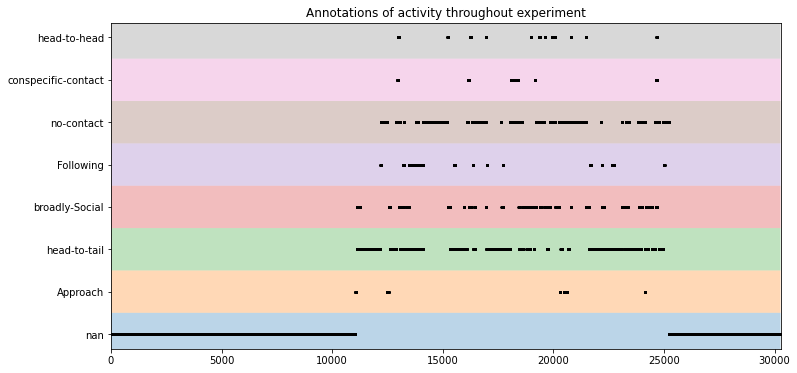

In [7]:
plt.figure(figsize=(12,6))
for i in range(len(n.unique(annotations))):
    plt.fill_between(ts, i-0.5, i+0.5, alpha=0.3)
plt.scatter(ts, annotations, s=3, color='k')
plt.xlim(min(ts), max(ts))
plt.title("Annotations of activity throughout experiment")

Text(0, 0.5, 'X Position (pixels)')

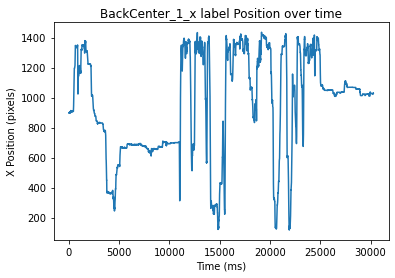

In [8]:
plt.plot(ts, experiment['BackCenter_1_x'])
plt.title("BackCenter_1_x label Position over time")
plt.xlabel("Time (ms)")
plt.ylabel("X Position (pixels)")

Text(0.5, 1.0, 'Trajectory of BackCenter for both mice between t=15000 and 16000')

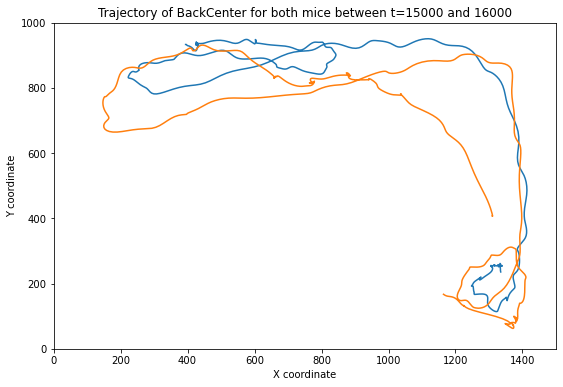

In [9]:
marker = 'BackCenter'
time = (15000,16000)
xlims = (0,1500)
ylims = (0,1000)
plt.figure(figsize=6*n.array([xlims[1]/ylims[1], 1]))


plt.plot(experiment[marker+'_1_x'][time[0]:time[1]],experiment[marker+'_1_y'][time[0]:time[1]])
plt.plot(experiment[marker+'_2_x'][time[0]:time[1]],experiment[marker+'_2_y'][time[0]:time[1]])

plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('X coordinate'); plt.ylabel("Y coordinate")
plt.title("Trajectory of %s for both mice between t=%d and %d" % (marker, time[0], time[1]))

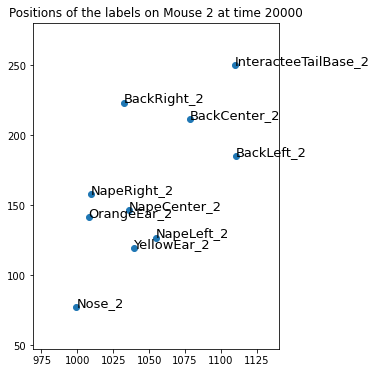

In [10]:

t = 20000
xs = []
ys = []
labs = []
for label in labels:
    mouse_idx = '2'
    if label[-1] == mouse_idx:
        xs.append(experiment[label+'_x'][t])
        ys.append(experiment[label+'_y'][t])
        labs.append(label)

xlims = (n.nanmin(xs) - 30, n.nanmax(xs)+30)
ylims = (n.nanmin(ys) - 30, n.nanmax(ys)+30)
plt.figure(figsize=6*n.array([(xlims[1]-xlims[0])/(ylims[1]-ylims[0]), 1]))
        
        
plt.scatter(xs, ys)
for i in range(len(xs)):
    plt.text(xs[i], ys[i], labs[i],fontsize=13)
    
plt.xlim(xlims)
plt.ylim(ylims)
plt.title("Positions of the labels on Mouse %s at time %d" % (mouse_idx, t))
plt.show()

### Calculate vectors

You can define a new vector in the dictionary `vectors`. The key is the name of the vector that is formed. The tuple contains two elements, the start point and end point of the vector. You can set the start or end point to be a tuple as well, in which case the average of the two vectors in the tuple will be taken (e.g. head_1 vector is from NapeCenter1 to the midpoint of green and red tape).

In [11]:
vectors = {'rear_1' : ('ImplantedTailBase_1', 'BackCenter_1'),
           'rear_2' : ('InteracteeTailBase_2', 'BackCenter_2'),
           'front_1': ('BackCenter_1', 'NapeCenter_1'),
           'front_2': ('BackCenter_2', 'NapeCenter_2'),
           'head_1' : ('NapeCenter_1', ('GreenTape_1', 'RedTape_1')),
           'head_2' : ('NapeCenter_2', ('YellowEar_2', 'OrangeEar_2')),
           'front_1_to_front_2' : ('NapeCenter_1', 'NapeCenter_2'),
           'front_2_to_front_1' : ('NapeCenter_2', 'NapeCenter_1'),
           'front_1_to_rear_2' : ('NapeCenter_1', 'InteracteeTailBase_2'),
           'front_2_to_rear_1' : ('NapeCenter_2', 'ImplantedTailBase_1'),
           'rear_1_to_rear_2' : ('BackCenter_1','BackCenter_2'),
           'rear_2_to_rear_1' : ('BackCenter_2','BackCenter_1')}

In [15]:
names = []
datas = []
dtypes = []
for vec in vectors.keys():
    names.append(vec+'_ang')
    names.append(vec+'_vec_x')
    names.append(vec+'_vec_y')    
    names.append(vec+'_start_x')
    names.append(vec+'_start_y')
    dtypes += [n.float]*5
    datas += [n.zeros(experiment.shape[0])]*5

/tmp/ipykernel_6795/1794910910.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes += [n.float]*5


In [16]:
# %%time
exp = rfn.append_fields(experiment, names, datas, dtypes)
exp = n.array(exp, exp.dtype)
for vec in vectors:
    start = vectors[vec][0]
    end = vectors[vec][1]
        
    if type(start) == tuple:
        start_xs = 0.5*(exp[start[0] + '_x'] + exp[start[1] + '_x'] )
        start_ys = 0.5*(exp[start[0] + '_y'] + exp[start[1] + '_y'] )
    else: 
        start_xs = exp[start + '_x']
        start_ys = exp[start + '_y']

    if type(end) == tuple:
        end_xs = 0.5*(exp[end[0] + '_x'] + exp[end[1] + '_x'] )
        end_ys = 0.5*(exp[end[0] + '_y'] + exp[end[1] + '_y'] )
    else:
        end_xs = exp[end + '_x']
        end_ys = exp[end + '_y']
    
    vector = n.stack((end_xs-start_xs, end_ys-start_ys),axis=1)
    angles = utils.get_angle(vector, n.array([[1,0]]*vector.shape[0]))
    exp[vec+'_ang'] = angles
    exp[vec+'_vec_x'] = vector[:,0]
    exp[vec+'_vec_y'] = vector[:,1]
    exp[vec+'_start_x'] = start_xs
    exp[vec+'_start_y'] = start_ys

In [17]:
print("Now the of the variable exp also include the vectors you defined: ")
print(list(exp.dtype.fields))

Now the of the variable exp also include the vectors you defined: 
['t', 'ann', 'GreenTape_1_y', 'GreenTape_1_x', 'RedTape_1_y', 'RedTape_1_x', 'ImplantedTailBase_1_y', 'ImplantedTailBase_1_x', 'YellowEar_2_y', 'YellowEar_2_x', 'OrangeEar_2_y', 'OrangeEar_2_x', 'InteracteeTailBase_2_y', 'InteracteeTailBase_2_x', 'Head_1_y', 'Head_1_x', 'NapeCenter_1_y', 'NapeCenter_1_x', 'NapeRight_1_y', 'NapeRight_1_x', 'NapeLeft_1_y', 'NapeLeft_1_x', 'BackCenter_1_y', 'BackCenter_1_x', 'BackRight_1_y', 'BackRight_1_x', 'BackLeft_1_y', 'BackLeft_1_x', 'Nose_2_y', 'Nose_2_x', 'NapeCenter_2_y', 'NapeCenter_2_x', 'NapeRight_2_y', 'NapeRight_2_x', 'NapeLeft_2_y', 'NapeLeft_2_x', 'BackCenter_2_y', 'BackCenter_2_x', 'BackRight_2_y', 'BackRight_2_x', 'BackLeft_2_y', 'BackLeft_2_x', 'rear_1_ang', 'rear_1_vec_x', 'rear_1_vec_y', 'rear_1_start_x', 'rear_1_start_y', 'rear_2_ang', 'rear_2_vec_x', 'rear_2_vec_y', 'rear_2_start_x', 'rear_2_start_y', 'front_1_ang', 'front_1_vec_x', 'front_1_vec_y', 'front_1_start_x'

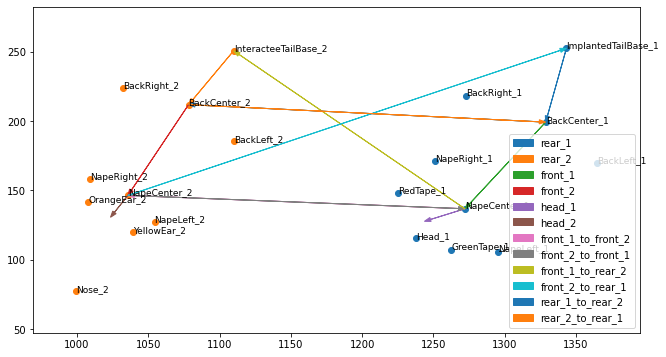

In [23]:

t = 20000
xs_1 = []
ys_1 = []
labs_1 = []
xs_2 = []
ys_2 = []
labs_2 = []
for label in labels:
    if label[-1] == str(1):
        xs_1.append(exp[label+'_x'][t])
        ys_1.append(exp[label+'_y'][t])
        labs_1.append(label)
    if label[-1] == str(2):
        xs_2.append(exp[label+'_x'][t])
        ys_2.append(exp[label+'_y'][t])
        labs_2.append(label)

xlims = (n.nanmin(n.concatenate((xs_1,xs_2))) - 30, n.nanmax(n.concatenate((xs_1,xs_2)))+30)
ylims = (n.nanmin(n.concatenate((ys_1,ys_2))) - 30, n.nanmax(n.concatenate((ys_1,ys_2)))+30)
plt.figure(figsize=6*n.array([(xlims[1]-xlims[0])/(ylims[1]-ylims[0]), 1]))
        
        
plt.scatter(xs_1, ys_1)
for i in range(len(xs_1)):
    plt.text(xs_1[i], ys_1[i], labs_1[i],fontsize=9)
plt.scatter(xs_2, ys_2)
for i in range(len(xs_2)):
    plt.text(xs_2[i], ys_2[i], labs_2[i],fontsize=9)
    

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
i = 0
for vec in vectors:
    plt.arrow(exp[vec+'_start_x'][t], exp[vec+'_start_y'][t], exp[vec+'_vec_x'][t], exp[vec+'_vec_y'][t], 
              width = 0.01,head_width=3, length_includes_head = True, label=vec, color=colors[i])
    i = (i + 1) % len(colors)
#     plt.plot([trial[vec+'_start_x'][t], trial[vec+'_start_x'][t]+trial[vec+'_vec_x'][t]], \
#              [trial[vec+'_start_y'][t], trial[vec+'_start_y'][t]+trial[vec+'_vec_y'][t]], label=vec)

plt.xlim(xlims)
plt.ylim(ylims)
plt.legend()
    

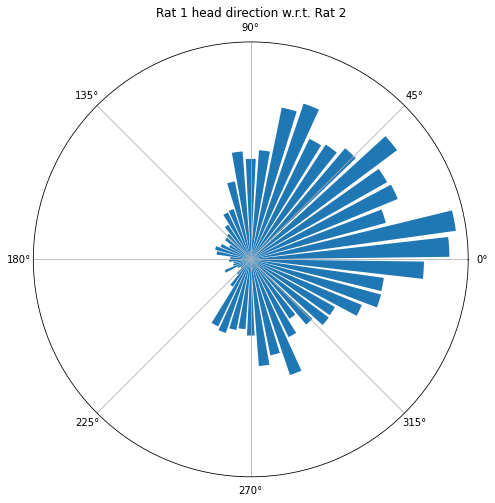

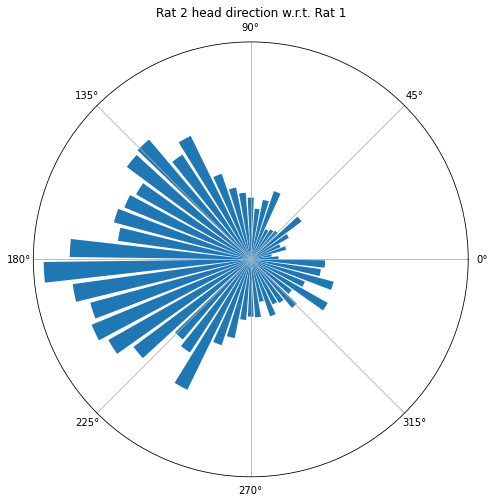

In [24]:
head_1_to_rat_2_diff = utils.compare_angles(exp['head_1_ang'],exp['front_1_to_front_2_ang'])
head_2_to_rat_1_diff = utils.compare_angles(exp['head_2_ang'], exp['front_2_to_front_1_ang'])

utils.plot_rad_hist(head_1_to_rat_2_diff, title='Rat 1 head direction w.r.t. Rat 2');
utils.plot_rad_hist(head_2_to_rat_1_diff, title='Rat 2 head direction w.r.t. Rat 1');

## Velocities

In [28]:
velocities_to_calculate = [
    'BackCenter_1',
    'BackCenter_2',
    'head_1_vec',
    'head_2_vec'
]

In [30]:
names = []; dtypes = []; datas = []
for label in velocities_to_calculate:
    names.append(label+'_vel_mag')
    names.append(label+'_vel_ang')
    names.append(label+'_vel_x')
    names.append(label+'_vel_y')    
    dtypes += [n.float]*4
    datas += [n.zeros(exp.shape[0])]*4

/tmp/ipykernel_6795/3741385634.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes += [n.float]*4


In [31]:
exp_with_vs = rfn.append_fields(exp, names, datas, dtypes)
exp_with_vs = n.array(exp_with_vs, exp_with_vs.dtype)

In [33]:
for label in velocities_to_calculate:
    vel_x = n.gradient(exp_with_vs[label+'_x'])
    vel_y = n.gradient(exp_with_vs[label+'_y'])
    vel_mag = n.sqrt(vel_x**2 + vel_y**2)
    xy_vec = n.stack((vel_x, vel_y), axis=1)
    vel_ang = utils.get_angle(xy_vec,n.array([[1,0]]*vector.shape[0]) )
    vel_label = label + '_vel'
    exp_with_vs[vel_label + '_mag'] = vel_mag
    exp_with_vs[vel_label + '_ang'] = vel_mag
    exp_with_vs[vel_label + '_x'] = vel_x
    exp_with_vs[vel_label + '_y'] = vel_y

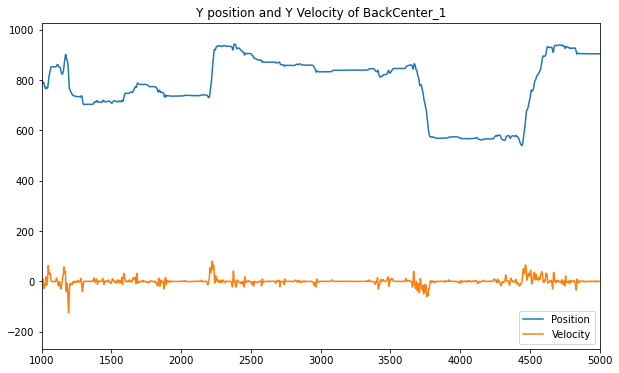

In [41]:
label = 'BackCenter_1'
plt.figure(figsize=(10,6))
plt.plot(exp_with_vs[label+'_y'], label='Position')
plt.plot(10*exp_with_vs[label+'_vel_y'], label='Velocity')
plt.xlim(1000,5000)
plt.title('Y position and Y Velocity of %s' % label)
plt.legend()

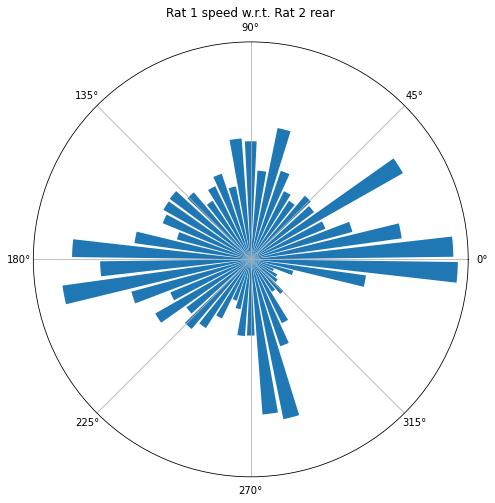

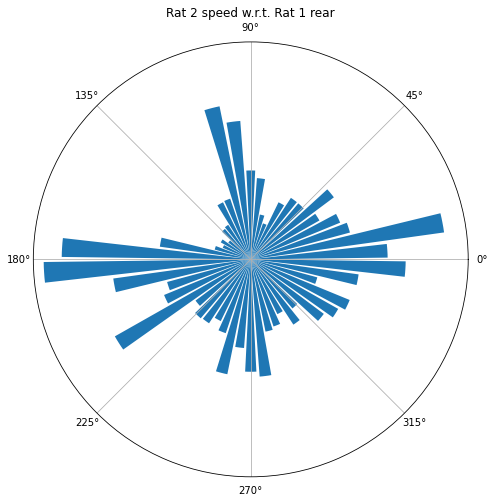

In [431]:
rat_1_to_rat_2_speed = compare_angles(trial['BackCenter_1_vel_ang'],trial['rear_1_to_rear_2_ang'])
rat_2_to_rat_1_speed = compare_angles(trial['BackCenter_2_vel_ang'],trial['rear_2_to_rear_1_ang'])



plot_rad_hist(rat_1_to_rat_2_speed, title='Rat 1 speed w.r.t. Rat 2 rear');
plot_rad_hist(rat_2_to_rat_1_speed, title='Rat 2 speed w.r.t. Rat 1 rear');